**NARGEOT** Melvine
**PATTE** Mathys

# Projet Outil Informatique

https://www.sciencedirect.com/topics/earth-and-planetary-sciences/volcanic-aerosol

The Greenhouse Effect, Aerosols, and Climate Change

Daniel Kirk-Davidoff, in Green Chemistry, 2018

"Volcanoes emit sulfur dioxide gas (SO2), which reacts with water in the atmosphere to form sulfuric acid (H2SO4). When volcanic plumes are emitted powerfully enough to reach the stratosphere,a the H2SO4 can form a persistent haze of liquid droplets, reflecting away sunlight and cooling the earth for a year or two."

In [ ]:
%pip install numpy matplotlib pandas # Handle data
%pip install xarray netcdf4 h5netcdf # Handle NetCFD file
%pip install folium # World map
%pip install beautifulsoup4 # Web scrapping
%pip install geopandas
%pip install slugify

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import folium as fl
from bs4 import BeautifulSoup
from urllib.request import urlopen
import geopandas
import slugify

## Données

### Sources

https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes?page=1

https://volcano.si.edu/search_eruption.cfm

https://www.kaggle.com/datasets/jessemostipak/volcano-eruptions/

https://data.cerdi.uca.fr/erup-vol/

https://public.opendatasoft.com/explore/dataset/significant-volcanic-eruption-database/export/

https://www.ngdc.noaa.gov/hazel/view/hazards/volcano/event-search/

https://berkeleyearth.org/data/

https://disc.gsfc.nasa.gov/datasets?keywords=%22msvolso2l4%22%7C%22tomsn7so2%22%7C%22OMPS_NPP_NMSO2_PCA_L2%22%7C%22MSAQSO2L4%22&page=1&subject=Aerosols
https://measures.gesdisc.eosdis.nasa.gov/data/SO2/MSVOLSO2L4.4/MSVOLSO2L4_v04-00-2022m0505.txt

### Import

In [2]:
so2 = pd.read_csv("datasets/so2.txt", sep="\t")

so2.shape

(2203, 13)

In [3]:
so2_cleared = so2.dropna(subset=['so2(kt)'])

so2_cleared

,volcano,lat,lon,v_alt,yyyy,mm,dd,type,vei,p_alt_obs,p_alt_est,so2(kt),Unnamed: 12
0,Ambrym,-16.25,168.12,1.334,1978.0,12.0,5.0,exp,2.0,-999.0,11.334,87.0,NaN
1,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,1.0,eff,2.0,2.0,-999.000,10.0,NaN
2,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,2.0,eff,2.0,7.0,-999.000,60.0,NaN
3,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,3.0,eff,2.0,2.0,-999.000,40.0,NaN
4,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,4.0,eff,2.0,3.0,-999.000,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,Chikurachki,50.325,155.458,1.816,2022.0,1.0,31.0,exp,2.0,8.0,-999.000,7.0,NaN
2193,Etna,37.734,15.004,3.350,2022.0,2.0,11.0,exp,2.0,10.0,-999.000,15.0,NaN
2194,Etna,37.734,15.004,3.350,2022.0,2.0,22.0,exp,2.0,10.0,-999.000,17.0,NaN
2197,Bezymianny,55.978,160.587,2.882,2022.0,3.0,16.0,exp,3.0,12.0,-999.000,5.0,NaN


In [4]:
# Add countries to volcano

gdf_eruptions = geopandas.read_file("datasets/significant-volcanic-eruption-database.geojson")

volcano_id_geojson = sorted([slugify.slugify(name) for name in gdf_eruptions['name'].unique()])

len(volcano_id_geojson)

267

In [5]:
volcano_weather = pd.DataFrame(columns=['year', 'month', 'volcano_name', 'country', 'eruption_so2', 'lat', 'lng'])

In [6]:
volcano_weather['year'] = pd.to_datetime(so2_cleared['yyyy'], format="%Y").dt.year
volcano_weather['month'] = pd.to_datetime(so2_cleared['mm'], format="%m").dt.month
volcano_weather[['volcano_name', 'eruption_so2', 'lat', 'lng']] = so2_cleared[['volcano', 'so2(kt)', 'lat', 'lon']]

volcano_weather['id'] = volcano_weather['volcano_name'].apply(lambda x: slugify.slugify(x))

volcano_id_customdf = sorted(volcano_weather[volcano_weather['id'].isin(volcano_id_geojson)]['id'].unique().tolist())

len(volcano_weather['volcano_name'].unique().tolist())

142

In [7]:
volcano_id_geojson

['adatara',
 'agung',
 'akagi',
 'akita-yake-yama',
 'alaid',
 'alayta',
 'ambalatungan-group',
 'ambrym',
 'aniakchak',
 'aoba',
 'aoga-shima',
 'apoyeque',
 'ararat',
 'arenal',
 'arhab-harra-of',
 'asama',
 'askja',
 'aso',
 'asuncion',
 'augustine',
 'avachinsky',
 'awu',
 'azul-cerro',
 'azuma',
 'bagana',
 'balbi',
 'bam',
 'banda-api',
 'bandai',
 'banua-wuhu',
 'bardarbunga',
 'batur',
 'bezymianny',
 'billy-mitchell',
 'black-peak',
 'bona-churchill',
 'bulusan',
 'calbuco',
 'cameroon-mt',
 'camiguin',
 'campi-flegrei',
 'carran-los-venados',
 'ceboruco',
 'cendres-ile-des',
 'cereme',
 'chaiten',
 'changbaishan',
 'chichon-el',
 'chokai',
 'cleveland',
 'colima',
 'colo-una-una',
 'cosiguina',
 'cotopaxi',
 'daisetsu',
 'dakataua',
 'dama-ali',
 'deception-island',
 'didicas',
 'dieng-volc-complex',
 'dona-juana',
 'dubbi',
 'dukono',
 'e-san',
 'egon',
 'epi',
 'esjufjoll',
 'etna',
 'eyjafjallajokull',
 'fayal',
 'fentale',
 'fogo',
 'fournaise-piton-de-la',
 'fuego',
 'fu

In [8]:
set(volcano_weather['id'].unique().tolist()) - set(volcano_id_geojson)

{'ambae',
 'anatahan',
 'asosan',
 'barren-island',
 'bogoslof',
 'bromo',
 'cameroon',
 'canlaon',
 'cerro-azul',
 'cerro-negro',
 'chikurachki',
 'chirinkotan',
 'colo',
 'copahue',
 'cordon-caulle',
 'dalaffilla',
 'el-chichon',
 'fernandina',
 'fourpeaked',
 'fukutoku-okanoba',
 'garbuna',
 'great-sitkin',
 'heard',
 'holuhraun',
 'home-reef',
 'hudson',
 'hunga-tonga-hungaapai',
 'jebel-al-tair',
 'kambalny',
 'kirishimayama',
 'kizimen',
 'koryaksky',
 'kuchinoerabujima',
 'lascar',
 'lateiki',
 'lewotolo',
 'lopevi',
 'makushin',
 'manda-hararo',
 'marchena',
 'miyakejima',
 'momotombo',
 'mt-st-helens',
 'nishinoshima',
 'oldoinyo-lengai',
 'ontakesan',
 'pagan',
 'pavlof',
 'piton-de-la-fournaise',
 'planchon-peteroa',
 'rincon-de-la-vieja',
 'san-miguel',
 'sangeang-api',
 'semisopochnoi',
 'sheveluch',
 'sierra-negra',
 'south-sarigan',
 'talang',
 'telica',
 'tongariro',
 'turrialba',
 'wolf',
 'zhupanovsky',
 'zubair-group'}

In [9]:
volcano_map = fl.Map(zoom_start=10)

for index, row in volcano_weather.drop_duplicates(subset='volcano_name', keep='first').iterrows():
    fl.Marker(
        location=[row['lat'], row['lng']],
        popup=row['volcano_name']
    ).add_to(volcano_map)

volcano_map

In [10]:
url = "https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?block_no=47401"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
rows = soup.find_all("tr", {"class": "mtx"})

for row in rows:
    data = row.get_text().split(' ')
    
    
    
rows[1].get_text(" ").split(' ')

['1939',
 '-7.5',
 '-6.6',
 '-1.4',
 '4.0',
 '7.5',
 '13.0',
 '17.4',
 '20.0',
 '17.4',
 '9.7',
 '3.0',
 '-2.5',
 '6.2']

## Analyse

In [12]:
monthly_t = pd.read_json("datasets/monthly_t.json") # Reading the json file of global monthly temperature anomaly

monthly_t = monthly_t.loc[monthly_t["Source"] == "GISTEMP"] # Only keep values from GISTEMP (nasa)
monthly_t.reset_index(inplace=True) # Reset row index to manipulate rows easily

# Splitting the date in format yyyy-mm-dd into Year and Month to use it with other data later
year = [monthly_t["Date"][date].year for date in range(len(monthly_t["Date"]))] # Create a 'Year' column from the timestamp given in 'Date'
monthly_t["year"] = year

month = [monthly_t["Date"][date].month for date in range(len(monthly_t["Date"]))] # Create a 'Month' column from the timestamp given in 'Date'
monthly_t["month"] = month

monthly_t = monthly_t.drop(['Date', 'Source'], axis=1) # Delete useless rows for later use
monthly_t = monthly_t.reindex(columns=['year', 'month', 'Mean']) # Put date first then temperature anomaly
monthly_t.sort_values(by=['year','month'], inplace=True) # Sort by ascending date
monthly_t.reset_index(inplace=True, drop=True) # Reset index for readability 
monthly_t = monthly_t.rename(columns={"Mean" : "t_anomaly"}) # rename Mean for readability
monthly_t


,year,month,t_anomaly
0,1880,1,-0.30
1,1880,2,-0.21
2,1880,3,-0.18
3,1880,4,-0.27
4,1880,5,-0.14
...,...,...,...
1639,2016,8,0.98
1640,2016,9,0.87
1641,2016,10,0.89
1642,2016,11,0.93


In [17]:
monthly_t.reset_index(inplace=True, drop=True)
volcano_weather.reset_index(inplace=True, drop=True)

date = [str(volcano_weather["year"][date]) + str(volcano_weather["month"][date]) for date in range(len(volcano_weather["year"]))]
volcano_weather["date"] = date
date = [str(monthly_t["year"][date]) + str(monthly_t["month"][date]) for date in range(len(monthly_t["year"]))]
monthly_t["Date"] = date

monthly_t = monthly_t[monthly_t['Date'].isin(volcano_weather["date"])]


volcano_temperature = pd.merge(monthly_t, volcano_weather, on=["year", "month"], how="right")
print(volcano_temperature)


      year  month  t_anomaly    Date volcano_name country  eruption_so2  \
0     1978     12       0.11  197812       Ambrym     NaN          87.0   
1     1979      2      -0.09   19792   Cerro_Azul     NaN          10.0   
2     1979      2      -0.09   19792   Cerro_Azul     NaN          60.0   
3     1979      2      -0.09   19792   Cerro_Azul     NaN          40.0   
4     1979      2      -0.09   19792   Cerro_Azul     NaN          10.0   
...    ...    ...        ...     ...          ...     ...           ...   
2132  2022      1        NaN     NaN  Chikurachki     NaN           7.0   
2133  2022      2        NaN     NaN         Etna     NaN          15.0   
2134  2022      2        NaN     NaN         Etna     NaN          17.0   
2135  2022      3        NaN     NaN   Bezymianny     NaN           5.0   
2136  2022      4        NaN     NaN     Karymsky     NaN           8.0   

         lat      lng           id    date  
0     -16.25   168.12       ambrym  197812  
1      -0

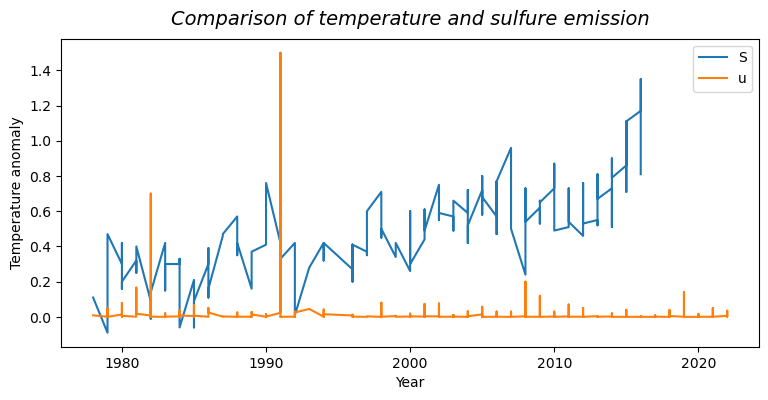

In [29]:
plt.figure(figsize=(9,4), dpi=100)
plt.plot(volcano_temperature["year"], volcano_temperature["t_anomaly"])
plt.xlabel('Year')
plt.ylabel('Temperature anomaly')
plt.legend(['Anomaly of temperature for each year'], loc=(0.02, 0.88))
plt.title('Comparison of temperature and sulfure emission', pad=10, fontsize=14, style='italic')
plt.subplot()
plt.plot(volcano_temperature["year"], volcano_temperature["eruption_so2"]/10000); plt.legend("Sulfure emission for each year")

c:\Users\mathy\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


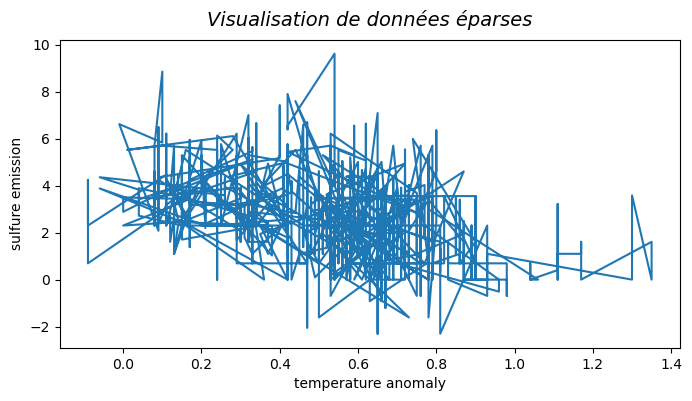

In [37]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(volcano_temperature["t_anomaly"], np.log(volcano_temperature["eruption_so2"]))
plt.xlabel('temperature anomaly'); plt.ylabel('sulfure emission'); # labels
plt.title('Visualisation de données éparses', pad=10, fontsize=14, style='italic'); # titre